# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

In [5]:
df.shape

(1596, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [7]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


<Axes: title={'center': 'Quality Distribution Plot'}, xlabel='quality', ylabel='Density'>

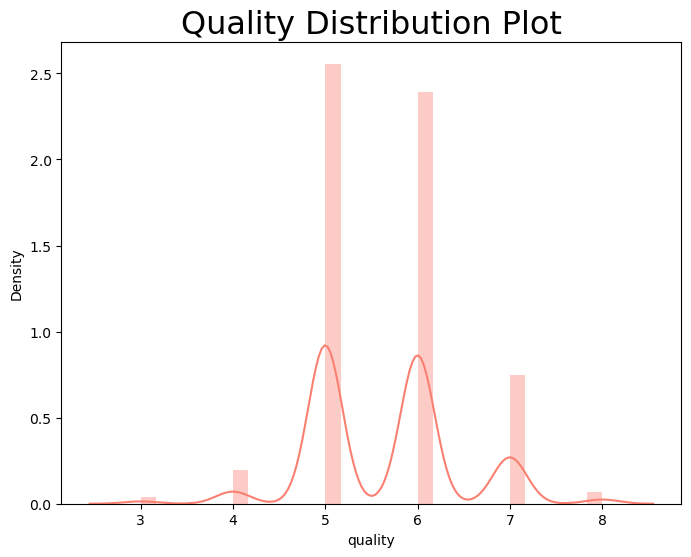

In [9]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot', fontsize=23)
sns.distplot(df['quality'], color='salmon')

# Splitting data

In [20]:
x=df.drop("quality",axis="columns")

y=df["quality"]


In [21]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
model.score(x_train,y_train)

0.5956112852664577

In [27]:
y_pred=model.predict(x_test)
y_pred

array([5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,

# Evaluation

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.66      0.76      0.71       136
           6       0.48      0.64      0.55       123
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.47      0.57      0.51       320

